In [1]:
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import pandas as pd
import os
from time import time
import numpy as np

print(tf.__version__)

1.12.0


In [2]:
mnist = keras.datasets.mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [14]:
Ntrain_data=train_data.astype('float32')/255
Ntrain_data=np.reshape(Ntrain_data,(-1,28,28,1))

Ntest_data=test_data.astype('float32')/255
Ntest_data=np.reshape(Ntest_data,(-1,28,28,1))

In [47]:

n_input=784
n_classes=10

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28,1),data_format="channels_last"))
model.add(keras.layers.Dense(32, activation=tf.nn.relu))
model.add(keras.layers.Dense(64, activation=tf.nn.relu))
model.add(keras.layers.Dense(n_classes, activation=tf.nn.softmax))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
batchsize=64
Nbatches=Ntrain_data.shape[0]/batchsize

In [50]:
train_labels[0]

5

In [51]:
Ntrain_y=keras.utils.to_categorical(train_labels)
Ntest_y=keras.utils.to_categorical(test_labels)

In [52]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

load=False
if load == True:
    latest=tf.train.latest_checkpoint(checkpoint_dir)
    model.load_weights(latest)
else:
    cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, 
                                                 save_weights_only=True,
                                                 verbose=1,period=2)
    #model.save_weights('./checkpoints/my_checkpoint')


    early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

    history = model.fit(Ntrain_data, Ntrain_y, epochs=10,validation_data=[Ntest_data, Ntest_y],batch_size=batchsize,
              callbacks=[cp_callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.3790 - acc: 0.8916 - val_loss: 0.2180 - val_acc: 0.9377
Epoch 2/10
59904/60000 [============================>.] - ETA: 0s - loss: 0.1813 - acc: 0.9465
Epoch 00002: saving model to training_1/cp.ckpt
60000/60000 [==============================] - 4s 62us/step - loss: 0.1812 - acc: 0.9465 - val_loss: 0.1512 - val_acc: 0.9535
Epoch 3/10
60000/60000 [==============================] - 3s 56us/step - loss: 0.1417 - acc: 0.9573 - val_loss: 0.1321 - val_acc: 0.9595
Epoch 4/10
59392/60000 [============================>.] - ETA: 0s - loss: 0.1175 - acc: 0.9645
Epoch 00004: saving model to training_1/cp.ckpt
60000/60000 [==============================] - 3s 54us/step - loss: 0.1173 - acc: 0.9645 - val_loss: 0.1274 - val_acc: 0.9607
Epoch 5/10
60000/60000 [==============================] - 3s 55us/step - loss: 0.1013 - acc: 0.9697 - val_loss: 0.1160 - val_acc: 0.9636
E

   val_loss  val_acc      loss       acc  epoch
5  0.107891   0.9665  0.089298  0.972767      5
6  0.105476   0.9687  0.079090  0.975633      6
7  0.103792   0.9684  0.070920  0.978217      7
8  0.101453   0.9689  0.064018  0.979217      8
9  0.101901   0.9705  0.058575  0.981733      9


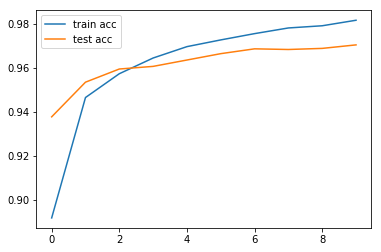

In [53]:
if load == False:    
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    print(hist.tail())
    plt.plot(hist['epoch'],hist['acc'])
    plt.plot(hist['epoch'],hist['val_acc'])
    plt.legend(['train acc','test acc'])

In [46]:
model.save('kerasMNIST_ModelDense.h5')
